In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from datetime import datetime

In [2]:
dateparse = lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

rating_dataset = pd.read_csv('ml-100k/u.data', sep='\t', 
                        names=['user_id', 'movie_id', 'rating', 'timestamp'], 
                        parse_dates=['timestamp'], 
                        date_parser=dateparse)

/tmp/ipykernel_1281/3068112406.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  rating_dataset = pd.read_csv('ml-100k/u.data', sep='\t',


In [3]:
rating_dataset

,user_id,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44
99996,716,204,5,1997-11-17 19:39:03
99997,276,1090,1,1997-09-20 22:49:55
99998,13,225,2,1997-12-17 22:52:36


# Exploratory Data Analysis on ratings dataset

In [4]:
pd.options.display.float_format = '{:.2f}'.format
print(rating_dataset['rating'].describe())

count   100000.00
mean         3.53
std          1.13
min          1.00
25%          3.00
50%          4.00
75%          4.00
max          5.00
Name: rating, dtype: float64


We are using the dataset consisting of 100,000 ratings with the mean of ratings at 3.53

In [5]:
df_rating = pd.DataFrame()
df_rating['counts'] = rating_dataset['rating'].value_counts().sort_index(ascending=False)
df_rating['percentage'] = round(df_rating['counts'] / len(rating_dataset) * 100)
df_rating = df_rating.reset_index()
df_rating.columns = ['Rating', 'Counts', 'Percentage']
df_rating

,Rating,Counts,Percentage
0,5,21201,21.00
1,4,34174,34.00
2,3,27145,27.00
3,2,11370,11.00
4,1,6110,6.00


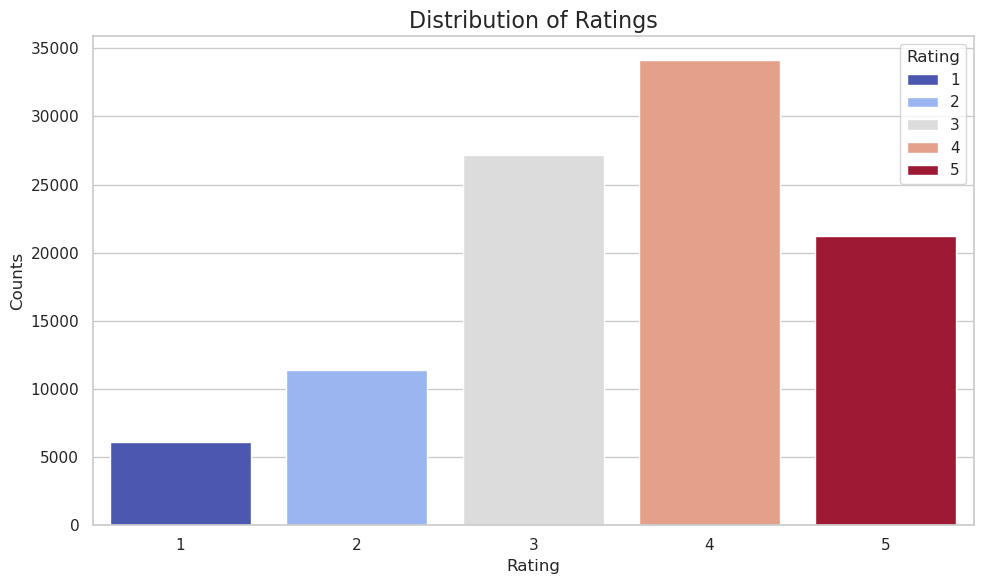

In [6]:
# Seaborn style
sns.set_theme(style="whitegrid")

# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=df_rating, x='Rating', y='Counts', palette='coolwarm', hue='Rating')

# Add labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Distribution of Ratings', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
rating_dataset.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')

In [8]:
rating_dataset['user_id'].nunique()

943

943 users have given these 100k ratings which shows many users have given multiple ratings

Checking the count of ratings given by each user id

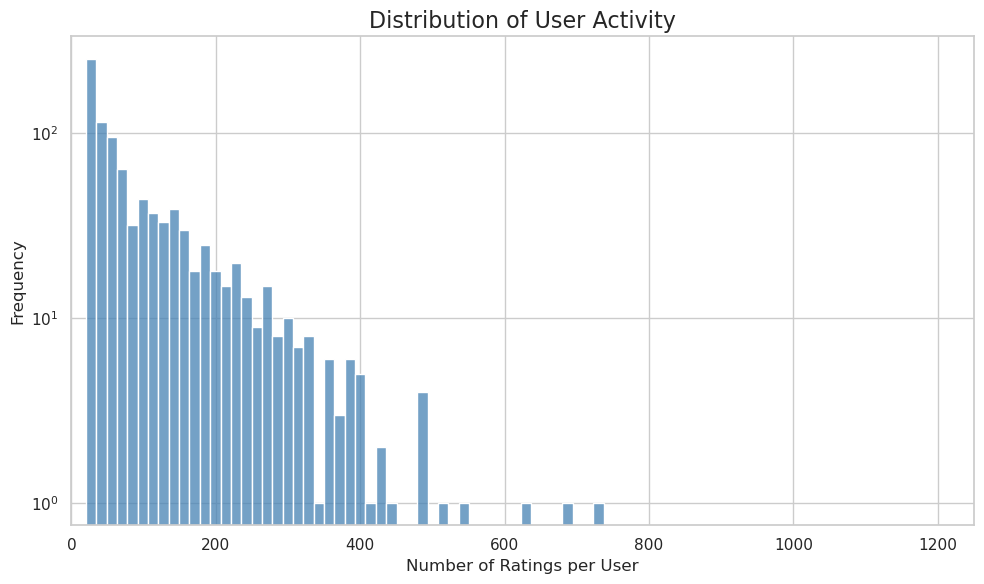

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of occurrences of each userId
user_counts = rating_dataset['user_id'].value_counts()

# Creating a DataFrame with these occurrences
df_plot = pd.DataFrame({'user_id': user_counts.index, 'counts': user_counts.values})

# Set Seaborn theme for improved aesthetics
sns.set_theme(style="whitegrid")

# Create a histogram to show the distribution of user activity
plt.figure(figsize=(10, 6))
sns.histplot(data=df_plot, x='counts', bins=50, kde=False, color='steelblue')
plt.yscale('log')
plt.xlim(0, 1250)

# Add titles and labels
plt.title('Distribution of User Activity', fontsize=16)
plt.xlabel('Number of Ratings per User', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [9]:
# Add a 'ratings_per_user' column with the count of ratings per 'userId'.
rating_dataset['ratings_per_user'] = rating_dataset.groupby('user_id')['user_id'].transform('count')

# Display the first 2 rows
rating_dataset.head(5)

,user_id,movie_id,rating,timestamp,ratings_per_user
0,196,242,3,1997-12-04 15:55:49,39
1,186,302,3,1998-04-04 19:22:22,92
2,22,377,1,1997-11-07 07:18:36,128
3,244,51,2,1997-11-27 05:02:03,238
4,166,346,1,1998-02-02 05:33:16,20


In [10]:
# Print the counts of the 20 most common 'ratings_per_user' values.
print(rating_dataset['ratings_per_user'].value_counts()[:20])

ratings_per_user
388    776
737    737
245    735
183    732
121    726
181    724
357    714
236    708
232    696
685    685
135    675
168    672
217    651
216    648
107    642
20     640
636    636
311    622
206    618
154    616
Name: count, dtype: int64


In [11]:
print(rating_dataset['ratings_per_user'].value_counts()[-20:])

ratings_per_user
82     164
158    158
157    157
52     156
77     154
153    153
72     144
69     138
134    134
130    130
126    126
125    125
123    123
61     122
119    119
117    117
113    113
94      94
85      85
78      78
Name: count, dtype: int64


As per our initial findings we can see that some users have given a high number of ratings while the minimum being 78. So the least number of ratings given by the user is also a high number

In [12]:
print(rating_dataset['ratings_per_user'].describe())

count   100000.00
mean       202.01
std        139.23
min         20.00
25%         98.00
50%        181.00
75%        278.00
max        737.00
Name: ratings_per_user, dtype: float64


On an avergae a user has given 202 ratings

In [13]:
# Add a new column 'avg_user_rating' with the average rating given by each user.
# This is calculated by grouping the data by 'userId' and then taking the mean of the 'rating' column.
rating_dataset['avg_user_rating'] = rating_dataset.groupby('user_id')['rating'].transform('mean')

# Display the first 2 rows
rating_dataset.head(2)

,user_id,movie_id,rating,timestamp,ratings_per_user,avg_user_rating
0,196,242,3,1997-12-04 15:55:49,39,3.62
1,186,302,3,1998-04-04 19:22:22,92,3.41


<Axes: xlabel='avg_user_rating', ylabel='ratings_per_user'>

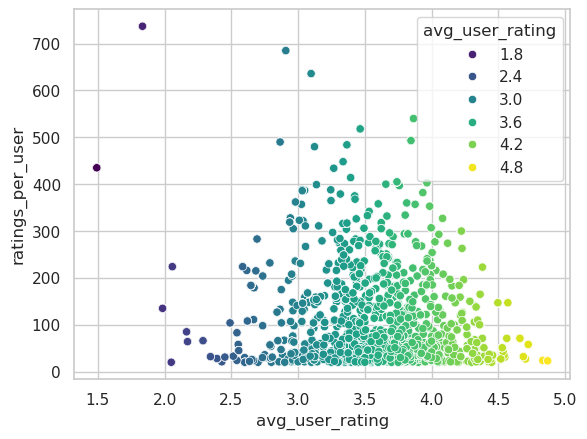

In [14]:
sns.scatterplot(x='avg_user_rating', y='ratings_per_user', data=rating_dataset, palette='viridis', hue = 'avg_user_rating')

From this scatterplot we can see that the average rating given by the user is normalized and has a mean around 3.5-3.6. Since the data is normalized we don't have to perform any other transformation before using this data. We can use this data directly for creating a ratings based recommender system.

In [15]:
# Print the counts of each unique 'userId', sorted in descending order.
# This provides a view of how many entries exist for each user, with the most frequent users listed first.
print(rating_dataset['user_id'].value_counts(ascending=False))

user_id
405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: count, Length: 943, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


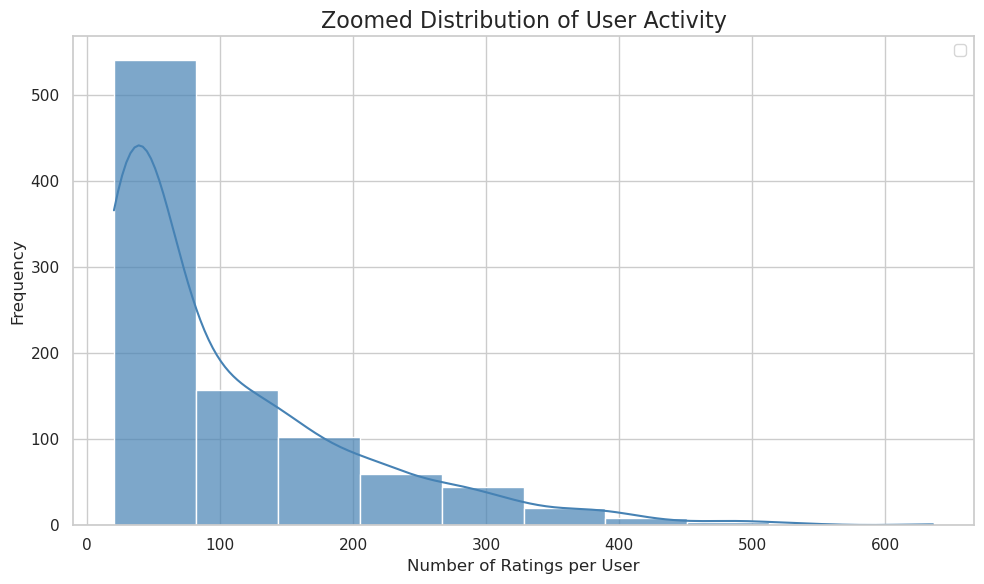

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where the 'counts' value is less than 644
df_plot_filtered = df_plot[df_plot['counts'] < 644]

# Set Seaborn theme for consistent styling
sns.set_theme(style="whitegrid")

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df_plot_filtered, x='counts', bins=10, kde=True, color='steelblue', alpha=0.7)

# Add a vertical red line at x=20
# plt.axvline(x=20, color='red', linestyle='--', linewidth=2, label='Threshold: x=20')

# Customize x-axis ticks
# plt.xticks(ticks=range(50, 501, 50))

# Customize y-axis ticks
# plt.yticks(ticks=range(0, 100001, 5000))

# Add title and axis labels
plt.title('Zoomed Distribution of User Activity', fontsize=16)
plt.xlabel('Number of Ratings per User', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a legend for the vertical line
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [18]:
rating_dataset

,user_id,movie_id,rating,timestamp,ratings_per_user,avg_user_rating
0,196,242,3,1997-12-04 15:55:49,39,3.62
1,186,302,3,1998-04-04 19:22:22,92,3.41
2,22,377,1,1997-11-07 07:18:36,128,3.35
3,244,51,2,1997-11-27 05:02:03,238,3.65
4,166,346,1,1998-02-02 05:33:16,20,3.55
...,...,...,...,...,...,...
99995,880,476,3,1997-11-22 05:10:44,368,3.43
99996,716,204,5,1997-11-17 19:39:03,269,3.89
99997,276,1090,1,1997-09-20 22:49:55,518,3.47
99998,13,225,2,1997-12-17 22:52:36,636,3.10


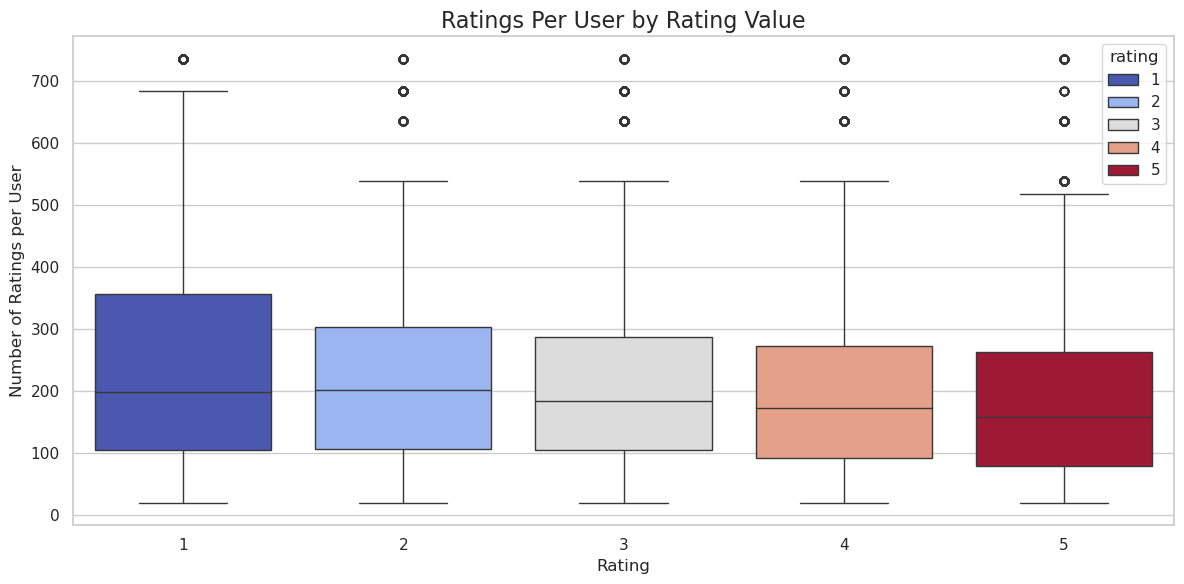

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = rating_dataset[rating_dataset['ratings_per_user'] < 2000]
plt.figure(figsize=(12, 6))

sns.boxplot(x='rating', y='ratings_per_user', data=df_filtered, palette='coolwarm', hue = 'rating')

# Add labels and title for better readability
plt.title('Ratings Per User by Rating Value', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Ratings per User', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


The distribution of ratings per user across all rating values (1 to 5) is somewhat similar, with medians clustering around 200 ratings per user.

Ratings like 1 and 5 have a slightly wider spread, indicating more variability in user activity for these ratings.

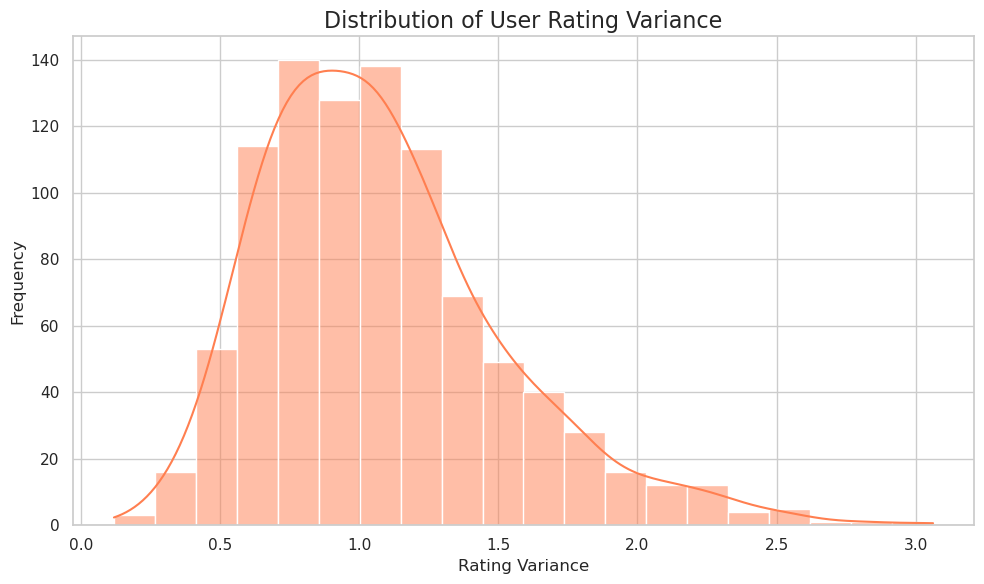

In [34]:
# User Rating Variance
user_rating_variance = rating_dataset.groupby('user_id')['rating'].var().dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_variance, bins=20, kde=True, color='coral')

plt.title('Distribution of User Rating Variance', fontsize=16)
plt.xlabel('Rating Variance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


Also the variance is not unusally high or low and is concentrated in between (bell curve) this shows data is not overly concentrated or excessively spread out, aligning well with normal distribution characteristics.